## Graphing in notebooks w/ matplotlib

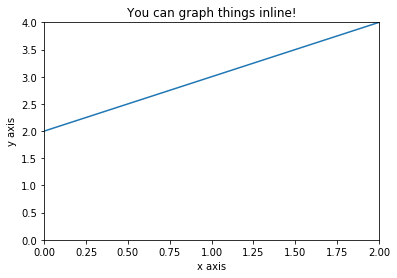

In [2]:
import matplotlib.pyplot as plt
plt.plot([0,2],[2,4])
plt.axis(xmin=0,xmax=2,ymin=0,ymax=4)
plt.title("You can graph things inline!")
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.show() # this is not necessary for notebooks, but is when you run the python script

## Drawing graphs
networkx is integrated with matplotlib, so you can draw graphs in notebooks

In [3]:
import jellyfish.graphs as graphs
import matplotlib.pyplot as plt
import networkx as nx

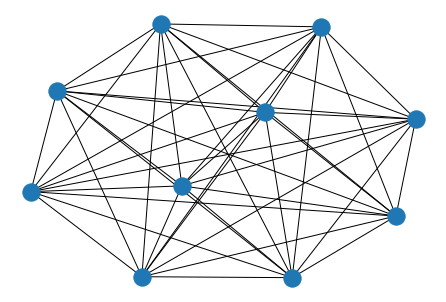

In [4]:
# This is a handy thing to use if you're making changes to a source file
import importlib
importlib.reload(graphs)

G = graphs.complete(10)
nx.draw(G)

# networkx uses matplotlib to draw things, 
# so you can save the image like this
plt.savefig("../figures/complete_graph.png")

plt.show()

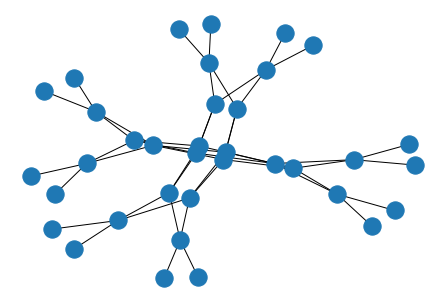

In [5]:
# here's what a fat tree looks like
G = graphs.fat_tree(4)
nx.draw(G)
plt.show()

## Jellyfish

In [6]:
import networkx as nx
#import fnss
import random
import matplotlib.pyplot as plt
import jellyfish.graphs as graphs
from collections import Counter

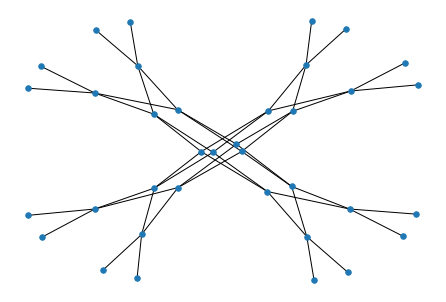

In [105]:
# Figure 1a
G1a = graphs.fat_tree(4)
nx.draw(G1a, node_size=30)
plt.savefig('figure1a.png')
plt.show()

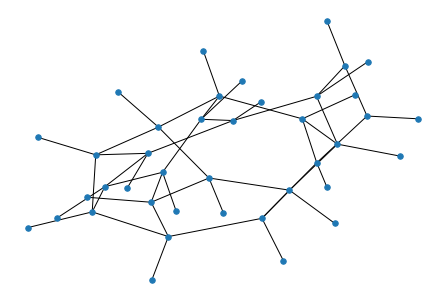

In [8]:
# Figure 1b
G1b = graphs.jellyfish(20, 4, 1)
nx.draw(G1b, node_size=30)
plt.savefig('figure1b.png')
plt.show()

## 1c

In [11]:
G1c_fat = graphs.fat_tree(14)
G1c_jelly = graphs.jellyfish(98, 14, 7)

In [12]:
def total_hops(G):
    hops = Counter()
    total = 0
    for n1, d1 in G.nodes.data():
        if d1.get('type') == 'host':
            for n2, d2 in G.nodes.data():
                if d2.get('type') == 'host' and n1 != n2:
                    hops[nx.shortest_path_length(G, n1, n2)] += 1
                    total += 1
    return hops, total

In [13]:
c1, tot1 = total_hops(G1c_fat)
c2, tot2 = total_hops(G1c_jelly)

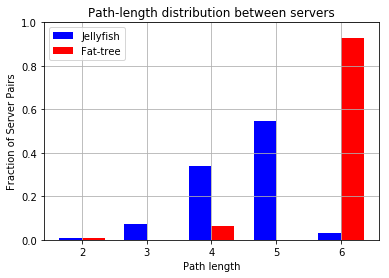

In [18]:
import numpy as np
index = np.arange(5)
bar_width = 0.35

x = [c1[i]/tot1 for i in range(2, 7)]
y = [c2[i]/tot2 for i in range(2, 7)]

fig, ax = plt.subplots()

jelly = ax.bar(index, y, bar_width, label="Jellyfish", color='blue')
fat = ax.bar(index+bar_width, x, bar_width, label="Fat-tree", color='red')

ax.set_xlabel('Path length')
ax.set_ylabel('Fraction of Server Pairs')
ax.set_title('Path-length distribution between servers')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels([i for i in range(2, 7)])
ax.legend()

plt.grid()
plt.ylim(0, 1)
#plt.savefig(filename)
plt.show()

## 2a

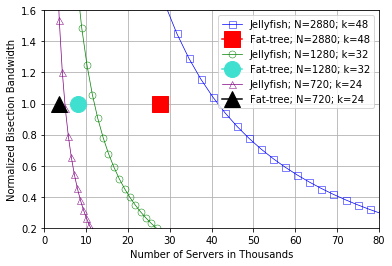

In [23]:
# switches = 720, k = 24, hosts-per-switch = hosts / switches
import math
#  lower bound (1 - sqrt(ln(2)/r)) * r/2 * |S|, |S| â‰¤ n/2
for N, k, lim, m, color, l, pc, pl in [(2880, 48, 85000, "s", "blue", 'Jellyfish; N=2880; k=48', "red", 'Fat-tree; N=2880; k=48'),\
                                       (1280, 32, 30000, "o", "green", 'Jellyfish; N=1280; k=32', "turquoise", 'Fat-tree; N=1280; k=32'), \
                                        (720, 24, 12000, "^", "purple", 'Jellyfish; N=720; k=24', "black", 'Fat-tree; N=720; k=24')]:
    x = []
    y = []
    for servers in range(N, lim, N):
        S = N / 2
        r = k - servers / N
        dS = (1 - math.sqrt(math.log(2)/r)) * (r /2) * S # this is a lower bound 
        x.append(servers/1000)
        y_i = 2*dS/(servers)
        y.append(y_i)
    plt.plot(x, y, marker=m, fillstyle='none', c=color, markersize=7, linewidth=0.7, mew=0.5, label=l) # TODO: fix markers, labels, title, legend etc.
    plt.plot([(k**3/4)/1000], [1.0], marker=m, markersize=16, color=pc, label=pl)
    
plt.xlim(0, 80)
plt.ylim(0.2, 1.6)
plt.legend(loc="upper right")
plt.xlabel("Number of Servers in Thousands")
plt.ylabel("Normalized Bisection Bandwidth")
plt.grid()
plt.savefig('figure2a.png')
plt.show()

#### 2b

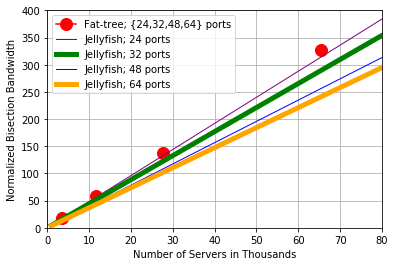

In [24]:
# Idea: Take server #, compute bandwidth approx and solve for #switches for bdw = 1. Then plot total number of ports!
# Jellyfish; 24 ports
#TODO: dS is an underestimate, so number of switches is slightly underestimated, too!

for k in [24, 36, 48, 64]:
    if k == 64:
        plt.plot([k**3/4000], [(((k/2)**2 +k**2)* k )/ 1000], marker='o', markersize=12, color='red',label='Fat-tree; {24,32,48,64} ports')
    else:
        plt.plot([k**3/4000], [(((k/2)**2 +k**2)* k )/ 1000], marker='o', markersize=12, color='red')

for k, c, s, r in [(24, 'purple', 1, 13), (32, 'green', 5, 18), (48, 'blue',1, 29), (64, 'orange', 5, 40)]:
    x = []
    y = []
    for servers in range(1000, 90000, 5000):
        dS = servers / 2
        S = dS / ((1 - math.sqrt(math.log(2)/r)) * (r /2))
        N = 2 * S
        x.append(servers/1000)
        y.append((N*k)/1000)
    plt.plot(x, y, label="Jellyfish; "+str(k)+" ports", color=c, linewidth=s)
    
plt.grid()
plt.xlim(0, 80)
plt.ylim(0, 400)
plt.xlabel("Number of Servers in Thousands")
plt.ylabel("Normalized Bisection Bandwidth")
plt.legend(loc="upper left")
plt.savefig('figure2b.png')
plt.show()

## Figure 9

In [94]:
# Start test here
#G = graphs.jellyfish(98, 14, 7)
#G = graphs.jellyfish(150, 14, 5) # GOOD
#G = graphs.jellyfish(230, 14, 4)
G = graphs.jellyfish(270, 14, 4) #BEST
#G = graphs.jellyfish(280, 14, 3)

In [95]:
def sp8():
    links = Counter()
    nodes = [n1 for n1, d1 in G.nodes.data() if d1.get('type') == 'host']
    for n2, d2 in G.nodes.data():
        if d2.get('type') == 'host':
            n1 = random.choice(nodes)
            k = 0
            current_links = set()
            for path in nx.shortest_simple_paths(G, n1, n2):
                length = len(path)
                for i in range(1, length - 2):
                    #links[(path[i], path[i+1])]+=1
                    #links[(path[i+1], path[i])]+=1 # ?
                    current_links.add((path[i], path[i+1]))
                    #current_links.add((path[i+1], path[i])) # ?
                k += 1
                if k == 8:
                    break
            for link in current_links:
                links[link] +=1
    return links

In [96]:
links1 = sp8()

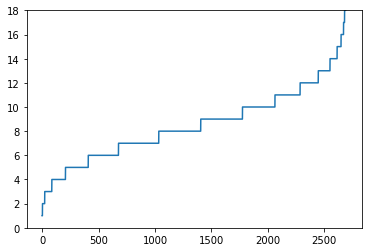

In [97]:
x = [i for i in range(len(links1.values()))]
plt.ylim(0, 18)
plt.plot(x, sorted(links1.values()))

In [98]:
#G = graphs.jellyfish(150, 14, 5)
#G = graphs.jellyfish(220, 14, 3)
def ecmpk(k):
    #nx.draw(G, node_size=5)
    #plt.show()
    links = Counter()
    nodes = [n1 for n1, d1 in G.nodes.data() if d1.get('type') == 'host']
    for n2, d2 in G.nodes.data():
        if d2.get('type') == 'host':
            n1 = random.choice(nodes)
            j = 0
            paths = []
            #print("################")
            c = Counter()
            p = []
            for path in nx.shortest_simple_paths(G, n1, n2):
                paths.append(path)

                j += 1
                if j == k:
                    break
            #print(c)
            p = random.choice(paths)
            length = len(p)
            for i in range(1, length - 2):
                links[(p[i], p[i+1])] += 1
                links[(p[i+1], p[i])] += 1# ??
    return links

In [99]:
links2 = ecmpk(8)

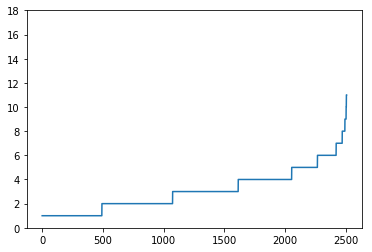

In [100]:
#print(sorted(links2.values())) # Yes this may work
x = [i for i in range(len(links2.values()))]
plt.ylim(0, 18)
plt.plot(x, sorted(links2.values()))

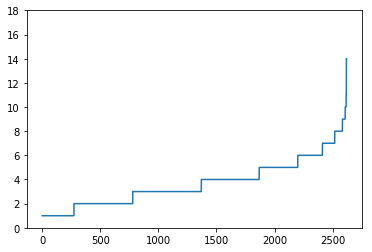

In [101]:
links3=ecmpk(64)
#print(sorted(links2.values())) # Yes this may work
x = [i for i in range(len(links3.values()))]
plt.ylim(0, 18)
plt.plot(x, sorted(links3.values()))

2699 2506 2620


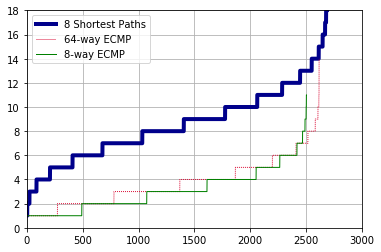

In [102]:
print(len(links1), len(links2), len(links3))
plt.plot([i for i in range(len(links1))], sorted(links1.values()), label="8 Shortest Paths", color='darkblue', linewidth=4)
plt.plot([i for i in range(len(links3))], sorted(links3.values()), label="64-way ECMP", color='crimson', linewidth=1, linestyle=(0, (1,1)))
plt.plot([i for i in range(len(links2))], sorted(links2.values()), label="8-way ECMP", color='green', linewidth=1)
plt.xlim(0, 3000)
plt.ylim(0, 18)
plt.grid()
plt.legend(loc="upper left")
plt.show
plt.savefig('figure9.png')
# THIS IS IT BABY

In [62]:
# Except if "number of distinct paths it is on"
# means I need to make paths into sets, and count those paths as the same
# (so only add link once for those).
# That also means I need to convert the node paths to EDGE paths so 
# as to permute EDGES instead of nodes (because links are no longer meaningful
# if nodes are reordered!!!!)

In [111]:
import jellyfish.helpers as helpers
path_global, path_fat = helpers.compute_paths_from_rtt()
plt.plot([3, 4, 5, 6], path_global, label="Jellyfish")
plt.plot([3, 4, 5, 6], path_fat, label="Fat-tree")
plt.grid()
plt.legend(loc="upper left")
plt.xlabel('Path length')
plt.ylabel('Fraction of Server Pairs')
plt.title('Path-length distribution between servers')

plt.grid()
plt.ylim(0, 1)
plt.savefig(filename)

NameError: name 're' is not defined